*Atuhor: Leonardo Bocchi*
<div align="center">
  <h1>Time Series Analysis: Assignment 2</h1>
  <h2>Multivariate Time Series and Reservoir Computing</h2>
</div>

The goal of this homework is to have a first hands on contact with multivariate autoregressive models
and with echo state (reservoir computing) networks as tools that aim to capture the temporal, interdepent
structure of multidimensional temporal series.
To this end, we will use a set of EEG data recorded during a psychophysical experiment aimed at testing
a hypothesis of the influence of motivation onto movement.

**Experimental Description** </br>
We will use a dataset from an experiment for the study on decision-making between movements of
opposite motor cost (FIG 1A). We asked our participants to perform this task under several conditions
of different social pressure (FIG 1B). This manipulation was aim at inducing different motivated states,
which we will use to measure by means of electro-encephalographic recordings.
A single participant takes part in each session. Each session is composed of several trials, to gather the
neural and behavioural data we will analyse next. Each trial follows the same timeline: it first starts with
the presentation of a geometrical distribution (blue rectangles) from an origin cue (a small red circle)
presented at the centre of the computer screen (FIG 1A). Once the stimuli have been presented, the
volunteer must choose a target and make a planar reaching movement, while trying to touch the rectangle
of his/her choice which was synchronized as a function of the finger position. At each trial, we recorded
the index finger trajectories as a response of the presentation of the stimuli by means of a 3D tracking
device, as well as electro-encephalographic signals, which provide us with a metric of the brain state at
the beginning of the trial.
It is well known that the cost of each movement exerts an influence on each trajectory and choice
between trajectories. Our hypothesis is that our motivated state also influences our decisions between
movements and/or the specifics of each movement we perform. To assess that, we measured how often
the volunteer chose the right/left rectangle and analysed the speed, movement and error rate.

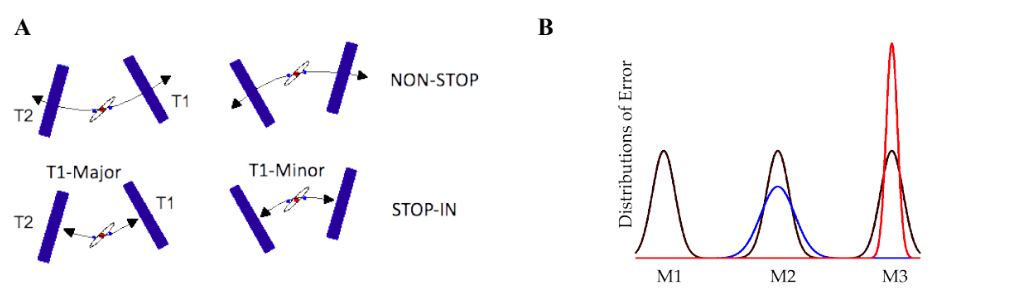

**Figure 1.** A. Presentation of geometrical schemas for decision-making. At each schema, there is two goals (T1 on
the right or T2 on the left), a red origin cue. All trajectories depart from that origin cue. To assess cost difference we
designed two T1-Major schemas (the movement towards the right implies a lesser cost, than the one towards the
left), and T1-Minor (reversed costs with respect to the T1-Major arrangement). B. Manipulation of the internal
motivation of the participant. Distributions of error of the participant (black) and of their partners (blue --- lesser skill,
and red – higher skill). </br>

Although the goal choice (rectangle) is free, the goal of each movement is that of winning points as by being more
precise by arriving at the centre of the rectangle long side. The more central is our arrival, the more points we will
win, the further off is our trajectory, the lower is the outcome. Furthermore, upon movement completion, we
showed the subject a green error bar [0-100%], indicating the amount of points earned in that trial. </br>
**We used social pressure to manipulate the participant’s motivated state.** In this context, the
manipulation of the motivational state consists of simulating the presence of a partner player with a skill
different from that of the participant. In summary, we create avatars to induce three potential motivated
states:

* State 0 (Motivation 0), play alone (most relax).
* State 1 (Motivation 1), Play with a player of a lesser skill.
* State 2 (Motivation 2), Play with a player of a higher skill level.

Furthermore, every time our participant finishes a trial by movement execution, we show him/her the
amount of points he/she won, contingent on the precision upon target arrival. We also show the points
of the partner on that specific trial (when playing with a partner). To prevent that the subject starts a
competition against the partner, we instructed him/her that the purpose of the partner’s presence is not
competition, but rather keeping company to the participant during task performance.

**Data Recordings** </br>
In addition to trajectories, which report the decision and assess movement precision, we also record
electro-encephalograms, which allow us to extract a metric of brain activity during decision-making for
each motivated state.

**DATA ANALYSIS** </br>
The part related to movement analyses is provided (no need to care about that). FIG 2 (left) shows three
typical trajectories in each of the three motivated states, in the centre it shows the precision error of our
participant in each of the three motivated states. In the centre, it shows the precision error of our subject
in each or the thee motivated states (1,2,3), and the graph in the centre shows the frequency with which
it selected the right target as a function of the motivated state.
The dataset is available at the following link:

https://ubarcelona-my.sharepoint.com/:f:/g/personal/ignasi_cos_ub_edu/EpKJUjB68ChCnJGOPYvgx9QBcnweW8xpZ1TdZDtITmVKQg?e=VRKldp

# Initialization

In [1]:
# General dependencies
import numpy as np
import scipy.io
import sys

# Task 1

**YOUR TASK**
Your dataset consists of a 42 dimensional time series of electroencephalographic activity extending for
over 1200ms, and organized in blocks of trials 432 trials of one of three types (Class 0, class 1, class2).
In summary, your dataset has 1200ms x 42 channels x 432 trial repetitions x 3 Classes.
Your first task consists of classifying the data in a two-step process:

1. Using a multivariate autoregressive model. Choose the proper autoregressive model from all the ones you recorded from, fit that model to the time series of each class. You should obtain three distinct sets of parameters, one for each class.
2. Combine these sets of parameters with a 1NN classifier, and classify your 3 classes. Provide confusion matrices and classification accuracy metrics.
3. We suggest you divide the data (80% of the 432 trial repetitions) into a training dataset, the data you use to fit the model for each of the three classes. Use the remaining 20% to test whether your fit and classification are working properly.

----------------------

In [2]:
# Load .mat file
mat_data = scipy.io.loadmat('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/90 - Time Series Analysis/Assignment_2/timeseries2.mat')

# Extract 'ic_data4' variable
ic_data4 = mat_data['ic_data4']

# Verify the shape of the variable
print(ic_data4.shape)

(42, 1200, 108, 12)


We first process the data in order to obtain one group for each class. This results in three array of shape (432, 1200, 42), corresponding to (n_samples, time, channels). The groups' dimensions are transposed this way in order to be imlemented correctly later in the use of the different functions.

In [6]:
# Define the block order for each class
class_0_blocks = [0, 1, 6, 7]
class_1_blocks = [2, 3, 8, 9]
class_2_blocks = [4, 5, 10, 11]

# Extract data for each class
class_0_data = np.concatenate([ic_data4[:, :, :, block] for block in class_0_blocks], axis=2)
class_1_data = np.concatenate([ic_data4[:, :, :, block] for block in class_1_blocks], axis=2)
class_2_data = np.concatenate([ic_data4[:, :, :, block] for block in class_2_blocks], axis=2)

# Reshape the data to the more common format having (n_samples, dim2, dim3)
class_0_data = np.transpose(class_0_data, (2,1,0))
class_1_data = np.transpose(class_1_data, (2,1,0))
class_2_data = np.transpose(class_2_data, (2,1,0))

# Verify the shapes of the extracted data
print("Class 0 data shape:", class_0_data.shape)
print("Class 1 data shape:", class_1_data.shape)
print("Class 2 data shape:", class_2_data.shape)

Class 0 data shape: (432, 1200, 42)
Class 1 data shape: (432, 1200, 42)
Class 2 data shape: (432, 1200, 42)


We now fit a Vector Autoregressive Model (VAR) on each sample and retrieve the parameters. </br>
In order to do so we use the VAR model implemented in the library statsmodels. statsmodels.tsa.vector_ar contains methods that are useful for simultaneously modeling and analyzing multiple time series using Vector Autoregressions (VAR) and Vector Error Correction Models (VECM). More information about the library can be found [here](https://www.statsmodels.org/stable/gettingstarted.html#documentation). </br>
When fitting the model we rely on the class .fit method in order to perform lag order selection. In general the selection is computationally expensive, in particular if performed over different samples. One solution could be to perform lag order selection only over few samples, or even only one. However, in particular when working with different classes of data, the approach implemented seemed more appropriate to select the best. This limits our selection using only a max lag order of 6. However, it needs to be noticed that going over certain values quickly increases the required RAM usage for the following analysis. For the scope of this analysis we are thus satisfied with this implementation.

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

params_class_0 = []
params_class_1 = []
params_class_2 = []

for i in range(class_0_data.shape[0]):
  # Fit VAR model to Class 0 data
  model_class_0 = VAR(class_0_data[i])
  results_class_0 = model_class_0.fit()

  # Fit VAR model to Class 1 data
  model_class_1 = VAR(class_1_data[i])
  results_class_1 = model_class_1.fit()

  # Fit VAR model to Class 2 data
  model_class_2 = VAR(class_2_data[i])
  results_class_2 = model_class_2.fit()

  # Obtain model parameters for each class
  params_class_0.append(results_class_0.params)
  params_class_1.append(results_class_1.params)
  params_class_2.append(results_class_2.params)

Selecting the lag order produces, in general, sets of parameters with different dimensions. We thus padd all the smaller samples with zeros, in order to have a consistent dimensionality for the sets of parameters.

In [ ]:
max_size = 0

for i in range(len(params_class_0)):
  if max_size < params_class_0[i].shape[0]:
    max_size = params_class_0[i].shape[0]
  if max_size < params_class_1[i].shape[0]:
    max_size = params_class_1[i].shape[0]
  if max_size < params_class_2[i].shape[0]:
    max_size = params_class_2[i].shape[0]
print(max_size)
for i in range(len(params_class_0)):
  padded_sample = np.zeros([max_size, 42])
  padded_sample[:params_class_0[i].shape[0], :] = params_class_0[i]
  params_class_0[i] = padded_sample

  padded_sample = np.zeros([max_size, 42])
  padded_sample[:params_class_1[i].shape[0], :] = params_class_1[i]
  params_class_1[i] = padded_sample

  padded_sample = np.zeros([max_size, 42])
  padded_sample[:params_class_2[i].shape[0], :] = params_class_2[i]
  params_class_2[i] = padded_sample

43


In [ ]:
# Print the parameters for each class
print("Class 0 Parameters:\n", params_class_0[0].shape)
print("Class 1 Parameters:\n", params_class_1[0].shape)
print("Class 2 Parameters:\n", params_class_2[0].shape)

Class 0 Parameters:
 (43, 42)
Class 1 Parameters:
 (43, 42)
Class 2 Parameters:
 (43, 42)


We can now use a classifier to classify each one of the samples to the corresponding class.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Combine parameters and create feature matrix
features = np.concatenate((params_class_0, params_class_1, params_class_2))

# Flatten the parameters of the models for each samples
features = features.reshape(features.shape[0], -1)

# Create labels for each class
labels = np.array([0] * len(params_class_0) + [1] * len(params_class_1) + [2] * len(params_class_2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize 1NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier with the training data
knn_classifier.fit(X_train, y_train)

# Evaluation (Training Data) ---------------------------------------------------
# Predict the class labels for the training data
predictions = knn_classifier.predict(X_train)

# Calculate the confusion matrix for the training data
confusion_mtx = confusion_matrix(y_train, predictions)

# Calculate the classification accuracy for the training data
accuracy = accuracy_score(y_train, predictions)

# Print the confusion matrix and accuracy for the testing data
print("Confusion Matrix (Training Data):\n", confusion_mtx)
print("Accuracy (Training Data): {:.2%}".format(accuracy))

# Evaluation (Testing Data) ----------------------------------------------------
# Predict the class labels for the Testing data
predictions = knn_classifier.predict(X_test)

# Calculate the confusion matrix for the Testing data
confusion_mtx = confusion_matrix(y_test, predictions)

# Calculate the classification accuracy for the Testing data
accuracy = accuracy_score(y_test, predictions)

# Print the confusion matrix and accuracy for the testing data
print("Confusion Matrix (Testing Data):\n", confusion_mtx)
print("Accuracy (Testing Data): {:.2%}".format(accuracy))

Confusion Matrix (Training Data):
 [[345   0   0]
 [  0 341   0]
 [  0   0 350]]
Accuracy (Training Data): 100.00%
Confusion Matrix (Testing Data):
 [[70 13  4]
 [34 40 17]
 [19 31 32]]
Accuracy (Testing Data): 54.62%


The results using a 1NN classifier are not particularly good. However, in order to see if this approach is a good one we can try using other classifiers, such as a RandomForestClassifier or a XGBClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier with the training data
rf_classifier.fit(X_train, y_train)

# Evaluation (Training Data) ---------------------------------------------------
# Predict the class labels for the training data
predictions = rf_classifier.predict(X_train)

# Calculate the confusion matrix for the training data
confusion_mtx = confusion_matrix(y_train, predictions)

# Calculate the classification accuracy for the training data
accuracy = accuracy_score(y_train, predictions)

# Print the confusion matrix and accuracy for the testing data
print("Confusion Matrix (Training Data):\n", confusion_mtx)
print("Accuracy (Training Data): {:.2%}".format(accuracy))

# Evaluation (Testing Data) ----------------------------------------------------
# Predict the class labels for the Testing data
predictions = rf_classifier.predict(X_test)

# Calculate the confusion matrix for the Testing data
confusion_mtx = confusion_matrix(y_test, predictions)

# Calculate the classification accuracy for the Testing data
accuracy = accuracy_score(y_test, predictions)

# Print the confusion matrix and accuracy for the testing data
print("Confusion Matrix (Testing Data):\n", confusion_mtx)
print("Accuracy (Testing Data): {:.2%}".format(accuracy))

Confusion Matrix (Training Data):
 [[345   0   0]
 [  0 341   0]
 [  0   0 350]]
Accuracy (Training Data): 100.00%
Confusion Matrix (Testing Data):
 [[82  5  0]
 [ 8 69 14]
 [ 0  2 80]]
Accuracy (Testing Data): 88.85%


In [ ]:
import xgboost as xgb

# Initialize the Random Forest Classifier
rf_classifier = xgb.XGBClassifier()

# Fit the classifier with the training data
rf_classifier.fit(X_train, y_train)

# Evaluation (Training Data) ---------------------------------------------------
# Predict the class labels for the training data
predictions = rf_classifier.predict(X_train)

# Calculate the confusion matrix for the training data
confusion_mtx = confusion_matrix(y_train, predictions)

# Calculate the classification accuracy for the training data
accuracy = accuracy_score(y_train, predictions)

# Print the confusion matrix and accuracy for the testing data
print("Confusion Matrix (Training Data):\n", confusion_mtx)
print("Accuracy (Training Data): {:.2%}".format(accuracy))

# Evaluation (Testing Data) ----------------------------------------------------
# Predict the class labels for the Testing data
predictions = rf_classifier.predict(X_test)

# Calculate the confusion matrix for the Testing data
confusion_mtx = confusion_matrix(y_test, predictions)

# Calculate the classification accuracy for the Testing data
accuracy = accuracy_score(y_test, predictions)

# Print the confusion matrix and accuracy for the testing data
print("Confusion Matrix (Testing Data):\n", confusion_mtx)
print("Accuracy (Testing Data): {:.2%}".format(accuracy))

Confusion Matrix (Training Data):
 [[345   0   0]
 [  0 341   0]
 [  0   0 350]]
Accuracy (Training Data): 100.00%
Confusion Matrix (Testing Data):
 [[84  2  1]
 [ 4 75 12]
 [ 0  3 79]]
Accuracy (Testing Data): 91.54%


In this case the accuracy and confusion matrix of the two methods are considerably better, scoring around 90% on the accuracy.

# Task 2

Your second task consists of building a second classifier by means of a reservoir computing network (see document attached). Reservoir computing networks consists of a random interconnected node structure, randomly interconnected in a parametric fashion. This inner structure serves the purpose of projecting your temporal series onto a static structure (the node’s activity vector). These activity is then related to an output, typically with a linear or logistic regressor, which in our case should yield a vector label that classifies the dataset in each class. Your goal here is:

1. Using the existing python code for reservoir computing networks, build your network and feed each of the three classes to the classifier independently. You can also use a 1NN to classify the different states provided by the node’s activity vector.
2. Again provide classification accuracies and confusion matrices.
3. Compare the first and second classifier, which operational differences are worth mentioning?

------------------------

Reservoir Computing is a machine learning framework that belongs to the broader field of recurrent neural networks (RNNs). It is a computationally efficient approach for training and utilizing recurrent neural networks, particularly for processing sequential data.

In Reservoir Computing, the network consists of two main components: the input layer and the reservoir (also known as the hidden layer). The input layer receives the sequential input data, while the reservoir is a randomly connected network of recurrent nodes or units. The reservoir acts as a fixed, random feature generator that transforms the input data into a high-dimensional space.

The key characteristic of Reservoir Computing is that only the connections from the reservoir to the output layer are trained, while the connections within the reservoir itself remain fixed. This makes the training process simpler and faster compared to traditional RNNs, where the recurrent connections are also updated during training.

Typically, a readout layer is connected to the reservoir to map the reservoir's dynamic state to the desired output. The readout layer is a linear regression or classification model that is trained to predict the target values based on the current state of the reservoir.

In order to implement a Reservoire Computing architecture to classify our data we can refer to the paper "Reservoir computing approaches for representation and classification of multivariate time series", which can be found [here](https://arxiv.org/abs/1803.07870), and the corresponding repository which can be found [here](https://github.com/FilippoMB/Time-series-classification-and-clustering-with-Reservoir-Computing.git).

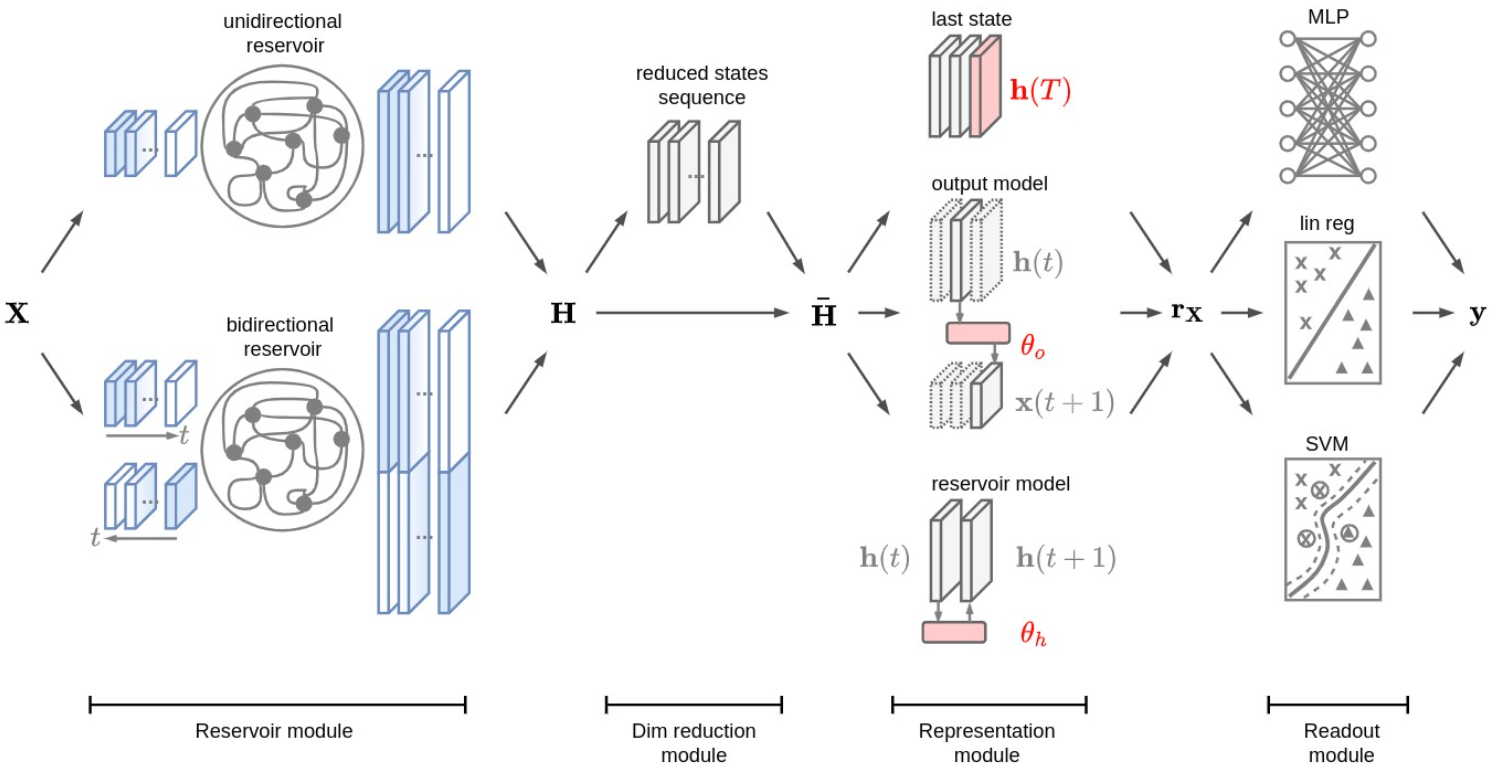

This library allows to quickly implement different architectures based on Reservoir Computing (the family of approaches popularized in machine learning by Echo State Networks) for classification or clustering of univariate/multivariate time series.

Several options are available to customize the RC model, by selecting different configurations for each module.
1. The **reservoir** module specifies the reservoir configuration (*e.g.*, bidirectional, leaky neurons, circle topology);
2. The **dimensionality reduction** module (optionally) applies a dimensionality reduction on the produced sequence of the reservoir's states;
3. The **representation** module defines how to represent the input time series from the sequence of reservoir's states;
4. The **readout** module specifies the model to use to perform the final classification.

The representations obtained at step 3 can also be used to perform clustering.

The main class ```RC_model``` contained in [modules.py](https://github.com/FilippoMB/Reservoir-model-space-classifier/blob/master/code/modules.py) permits to specify, train and test an RC-model.
The RC-model is configured by passing to the constructor of the class ```RC_model``` a set of parameters. To get an idea, you can check ```classification_example.py``` or ```clustering_example.py``` where the parameters are specified through a dictionary (````config````).

The available configuration hyperparameters are listed in the following and, for the sake of clarity, are grouped according to which module of the architecture they refer to.


**1. Reservoir:**

- n_drop - number of transient states to drop
- bidir - use a bidirectional reservoir (True or False)
- reservoir - precomputed reservoir (object of class ````Reservoir```` in [reservoir.py](https://github.com/FilippoMB/Reservoir-model-space-classifier/blob/master/code/reservoir.py); if ```None```, the following hyperparameters must be specified:
    - n\_internal\_units = number of processing units in the reservoir
    - spectral_radius = largest eigenvalue of the reservoir matrix of connection weights (to guarantee the Echo State Property, set spectral\_radius <= leak <= 1)
    - leak = amount of leakage in the reservoir state update (optional, ````None```` or ````1.0```` --> no leakage)
    - circ = if True, generate a determinisitc reservoir with circle topology where each connection has the same weight
    - connectivity = percentage of nonzero connection weights (ignored if circ = ````True````)
    - input_scaling = scaling of the input connection weights (note that weights are randomly drawn from {-1,1})
    - noise_level = deviation of the Gaussian noise injected in the state update

**2. Dimensionality reduction:**

- dimred_method - procedure for reducing the number of features in the sequence of reservoir states; possible options are: ````None```` (no dimensionality reduction), ````'pca'```` (standard PCA) or ````'tenpca'```` (tensorial PCA for multivariate time series data)
- n_dim - number of resulting dimensions after the dimensionality reduction procedure

**3. Representation:**

- mts_rep - type of multivariate time series representation. It can be ````'last'```` (last state), ````'mean'```` (mean of all states), ````'output'```` (output model space), or ````'reservoir'```` (reservoir model space)
- w\_ridge\_embedding - regularization parameter of the ridge regression in the output model space and reservoir model space representation; ignored if mts_rep is ````None````

**4. Readout:**

- readout_type - type of readout used for classification. It can be ````'lin'```` (ridge regression), ````'mlp'```` (multilayer perceptron), ````'svm'```` (support vector machine), or ````None````. If ````None````, the input representations will be stored in the ````.input_repr```` attribute: this is useful for clustering and visualization. Also, if ````None````, the other Readout hyperparameters can be left unspecified.
- w\_ridge - regularization parameter of the ridge regression readout (only when readout_type is ````'lin'````)
- mlp\_layout - list with the sizes of MLP layers, e.g. ````[20,20,10]```` defines a MLP with 3 layers of 20, 20 and 10 units respectively (only when readout_type is ````'mlp'````)
- batch\_size - size of the mini batches used during training (only when readout_type is ````'mlp'````)
- num\_epochs - number of iterations during the optimization (only when readout_type is ````'mlp'````)
- w\_l2 = weight of the L2 regularization (only when readout_type is ````'mlp'````)
- learning\_rate = learning rate in the gradient descent optimization (only when readout_type is ````'mlp'````)
- nonlinearity = type of activation function; it can be ````{'relu', 'tanh', 'logistic', 'identity'}```` (only when readout_type is ````'mlp'````)
- svm\_gamma = bandwith of the RBF kernel (only when readout_type is ````'svm'````)
- svm\_C = regularization for the SVM hyperplane (only when readout_type is ````'svm'````)

In [ ]:
!git clone https://github.com/FilippoMB/Time-series-classification-and-clustering-with-Reservoir-Computing.git --quiet

In [ ]:
sys.path.append("/content/Time-series-classification-and-clustering-with-Reservoir-Computing/code")

from sklearn.preprocessing import OneHotEncoder
import modules
import reservoir

/content/Time-series-classification-and-clustering-with-Reservoir-Computing/code/tensorPCA.py:24: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(X.shape) is not 3:


In [ ]:
# ============ RC model configuration and hyperparameter values ============
config = {}
config['dataset_name'] = 'JpVow'

config['seed'] = 1
np.random.seed(config['seed'])

# Hyperarameters of the reservoir
config['n_internal_units'] = 60         # size of the reservoir
config['spectral_radius'] = 0.59        # largest eigenvalue of the reservoir
config['leak'] = 0.9                    # amount of leakage in the reservoir state update (None or 1.0 --> no leakage)
config['connectivity'] = 0.15           # percentage of nonzero connections in the reservoir
config['input_scaling'] = 0.1           # scaling of the input weights
config['noise_level'] = 0.01            # noise in the reservoir state update
config['n_drop'] = 5                    # transient states to be dropped
config['bidir'] = True                  # if True, use bidirectional reservoir
config['circ'] = False                  # use reservoir with circle topology

# Dimensionality reduction hyperparameters
config['dimred_method'] ='tenpca'       # options: {None (no dimensionality reduction), 'pca', 'tenpca'}
config['n_dim'] = 42                    # number of resulting dimensions after the dimensionality reduction procedure

# Type of MTS representation
config['mts_rep'] = 'reservoir'         # MTS representation:  {'last', 'mean', 'output', 'reservoir'}
config['w_ridge_embedding'] = 10.0      # regularization parameter of the ridge regression

# Type of readout
config['readout_type'] = 'lin'          # readout used for classification: {'lin', 'mlp', 'svm'}

# Linear readout hyperparameters
config['w_ridge'] = 5.0                 # regularization of the ridge regression readout

# SVM readout hyperparameters
config['svm_gamma'] = 0.005             # bandwith of the RBF kernel
config['svm_C'] = 5.0                   # regularization for SVM hyperplane

# MLP readout hyperparameters
config['mlp_layout'] = (10,10)          # neurons in each MLP layer
config['num_epochs'] = 2000             # number of epochs
config['w_l2'] = 0.001                  # weight of the L2 regularization
config['nonlinearity'] = 'relu'         # type of activation function {'relu', 'tanh', 'logistic', 'identity'}

print(config)

{'dataset_name': 'JpVow', 'seed': 1, 'n_internal_units': 60, 'spectral_radius': 0.59, 'leak': 0.9, 'connectivity': 0.15, 'input_scaling': 0.1, 'noise_level': 0.01, 'n_drop': 5, 'bidir': True, 'circ': False, 'dimred_method': 'tenpca', 'n_dim': 42, 'mts_rep': 'reservoir', 'w_ridge_embedding': 10.0, 'readout_type': 'lin', 'w_ridge': 5.0, 'svm_gamma': 0.005, 'svm_C': 5.0, 'mlp_layout': (10, 10), 'num_epochs': 2000, 'w_l2': 0.001, 'nonlinearity': 'relu'}


In [ ]:
# ============ Initialize, train and evaluate the RC model ============
classifier =  modules.RC_model(
                        reservoir=None,
                        n_internal_units=config['n_internal_units'],
                        spectral_radius=config['spectral_radius'],
                        leak=config['leak'],
                        connectivity=config['connectivity'],
                        input_scaling=config['input_scaling'],
                        noise_level=config['noise_level'],
                        circle=config['circ'],
                        n_drop=config['n_drop'],
                        bidir=config['bidir'],
                        dimred_method=config['dimred_method'],
                        n_dim=config['n_dim'],
                        mts_rep=config['mts_rep'],
                        w_ridge_embedding=config['w_ridge_embedding'],
                        readout_type=config['readout_type'],
                        w_ridge=config['w_ridge'],
                        mlp_layout=config['mlp_layout'],
                        num_epochs=config['num_epochs'],
                        w_l2=config['w_l2'],
                        nonlinearity=config['nonlinearity'],
                        svm_gamma=config['svm_gamma'],
                        svm_C=config['svm_C']
                        )

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Combine parameters and create feature matrix
Data = np.concatenate((class_0_data, class_1_data, class_2_data))

# Create labels for each class
labels = np.array([0] * class_0_data.shape[0] + [1] * class_1_data.shape[0] + [2] * class_2_data.shape[0])
labels = labels.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
onehot_labels = encoder.fit_transform(labels)

print("Data shape:", Data.shape)
print("Labels:", onehot_labels.shape)

Data shape: (1296, 1200, 42)
Labels: (1296, 3)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, onehot_labels, test_size=0.2, random_state=42)

tr_time = classifier.train(X_train, y_train)
print('Training time = %.2f seconds'%tr_time)

accuracy, f1 = classifier.test(X_test, y_test)
print('Accuracy = %.3f, F1 = %.3f'%(accuracy, f1))

Training time = 0.60 seconds
Accuracy = 0.942, F1 = 0.942


The first classifier, which uses a multivariate autoregressive model (VAR), and the second classifier, which uses a reservoir computing network, have several operational differences worth mentioning:

1. **Model Approach:** The first classifier (VAR) relies on fitting a multivariate autoregressive model to the time series data. It captures the temporal dependencies and relationships among the variables in the data.
The second classifier (reservoir computing) takes a different approach by transforming the input data using a high-dimensional nonlinear dynamical system (the reservoir). It doesn't explicitly model the temporal dependencies but uses the reservoir's dynamics to map the input to a higher-dimensional space.

2. **Training Process:** The first classifier (VAR) requires estimating the parameters of the VAR model using methods like maximum likelihood estimation. It involves solving optimization problems to find the best-fitting model.
The second classifier (reservoir computing) involves initializing and training the reservoir network. The training process typically involves generating dynamic reservoir states and adjusting the weights of the readout layer using techniques like linear regression or machine learning algorithms.

3. **Data Representation:** The first classifier (VAR) works directly with the time series data. It uses the values and temporal order of the variables to model their relationships.
The second classifier (reservoir computing) transforms the input data into high-dimensional states using the reservoir. The transformed states are then used as features for classification.

4. **Computational Complexity:** The computational complexity of the first classifier (VAR) depends on the order of the VAR model and the size of the time series data. Estimating the parameters can be computationally expensive, especially for large datasets or high-order models.
The second classifier (reservoir computing) can be computationally efficient, especially during the training phase, as it involves simple matrix operations and doesn't require iterative optimization.

5. **Interpretability:** The first classifier (VAR) provides model parameters that can be interpreted to understand the relationships between variables and their impact on the classification.
The second classifier (reservoir computing) may not provide direct interpretability of the reservoir states. However, it can still achieve good classification performance by leveraging the nonlinear mapping capabilities of the reservoir.

These operational differences highlight that the first classifier (VAR) focuses on capturing temporal dependencies explicitly through parameter estimation, while the second classifier (reservoir computing) relies on nonlinear transformations and dynamics of the reservoir for classification. The choice between the two approaches depends on the specific characteristics of the data, computational resources, interpretability requirements, and desired performance.